# para hoy
Aprendizaje no supervisado
indica que no se sabe que es lo que se busca aprender
donde se puede llegar a hacer un mixto de aprendizajes
ojo muchas veces los ground truth no son muy utiles

El algoritmo tiene la libertad de buscar los patrones entre los datos, a traves de agrupaciones o clasificaciones

La primera tecnica es el clustering, donde en estos cluster se van asignando las muestras, pero uno no sabe donde se colocan los datos(los grupos)

En k-means hay que indicar el numero de clusters para colocar los centroides en la data y la metrica indica la inercia de los datos al centroide

para saber cuantos clustering hay, hay que usar el metodo del codo que es una grafica que indica cuando el x genera concavidad en la curva, es decir, su punto minimo antes de que se mantenga constante

ejercicio
usando la data
limpieza
preprocesamiento
visualizaciones
clustering de 3 categorias (edad, ingresos)

## importando las librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
from sklearn.cluster import KMeans

## cargando la data

In [3]:
archivo='/Users/matiasinostrozacifuentes/Desktop/python_intro/DataScience_Unilever/Semana_7/Data/Mall_Customers.csv'
data=pd.read_csv(archivo)

## primeras impresiones

In [4]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


no hay nulos

In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


no hay valores extraños

In [7]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


no habian duplicados

## generando visualizaciones

<AxesSubplot:xlabel='Age', ylabel='Count'>

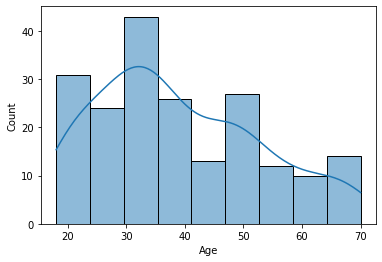

In [8]:
sns.histplot(data['Age'],kde=True)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

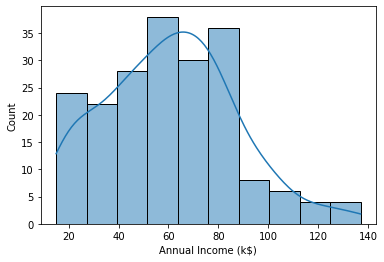

In [10]:
sns.histplot(data['Annual Income (k$)'],kde=True)

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

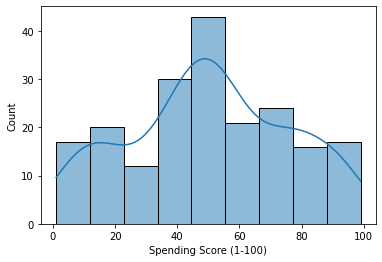

In [11]:
sns.histplot(data['Spending Score (1-100)'],kde=True)

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

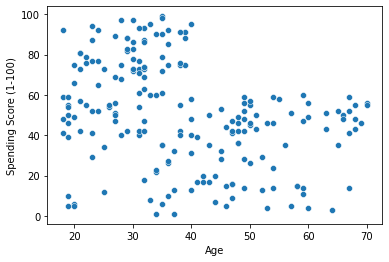

In [14]:
sns.scatterplot(data=data,y='Spending Score (1-100)',x='Age')

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

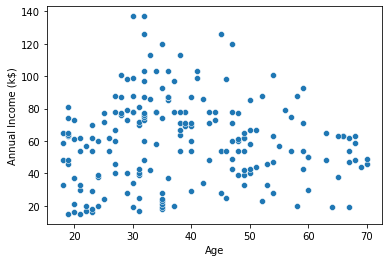

In [15]:
sns.scatterplot(data=data,y='Annual Income (k$)',x='Age')

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

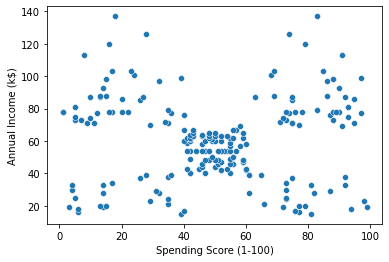

In [16]:
sns.scatterplot(data=data,y='Annual Income (k$)',x='Spending Score (1-100)')

generando los clustering

edad e income

In [84]:
X = data.drop(columns=['CustomerID','Gender','Spending Score (1-100)'])

(1.0, 20.0)

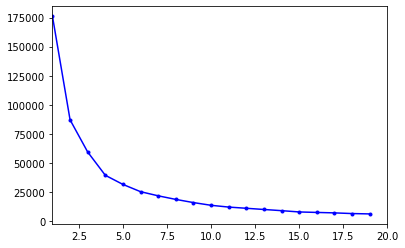

In [85]:
score = []
k_clusters = range(1,20)
for k in k_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score.append(-kmeans.score(X))
    

plt.plot(k_clusters, score,'b.-')
plt.xlim(1,20)

In [86]:
k = 10
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

y_pred = kmeans.predict(X)
y_pred

array([7, 7, 7, 7, 7, 7, 7, 7, 4, 7, 4, 7, 4, 7, 7, 7, 7, 7, 4, 7, 7, 7,
       4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 2, 2, 4, 2, 2, 8, 1, 1, 1, 8, 2, 1, 8, 2, 8, 1, 8, 2,
       1, 8, 2, 2, 8, 1, 8, 8, 8, 9, 1, 1, 9, 1, 8, 1, 8, 1, 9, 1, 1, 9,
       9, 1, 8, 9, 1, 1, 9, 9, 1, 9, 1, 9, 9, 1, 8, 9, 1, 9, 8, 1, 8, 8,
       8, 9, 3, 9, 9, 9, 8, 1, 1, 1, 9, 3, 3, 3, 9, 3, 3, 3, 0, 3, 3, 3,
       9, 3, 9, 3, 3, 3, 9, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6,
       0, 6, 0, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5,
       5, 5], dtype=int32)

El grafico

Text(0, 0.5, 'Income')

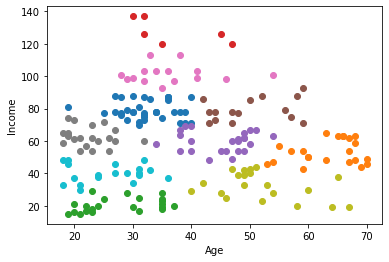

In [53]:
plt.plot(X[y_pred==0,0],X[y_pred==0,1],'o')
plt.plot(X[y_pred==1,0],X[y_pred==1,1],'o')
plt.plot(X[y_pred==2,0],X[y_pred==2,1],'o')
plt.plot(X[y_pred==3,0],X[y_pred==3,1],'o')
plt.plot(X[y_pred==4,0],X[y_pred==4,1],'o')
plt.plot(X[y_pred==5,0],X[y_pred==5,1],'o')
plt.plot(X[y_pred==6,0],X[y_pred==6,1],'o')
plt.plot(X[y_pred==7,0],X[y_pred==7,1],'o')
plt.plot(X[y_pred==8,0],X[y_pred==8,1],'o')
plt.plot(X[y_pred==9,0],X[y_pred==9,1],'o')
plt.xlabel('Age')
plt.ylabel('Income')

In [87]:
X=X.values

Text(0.5, 0, 'Age')

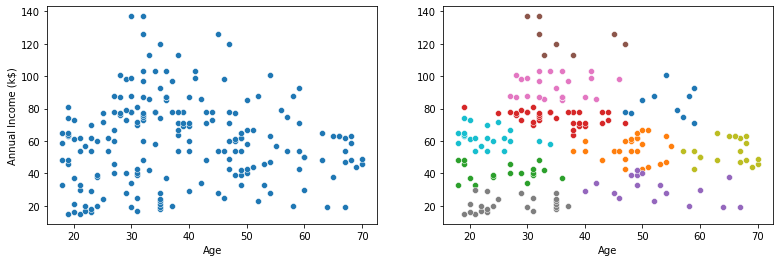

In [88]:
fig = plt.figure(figsize=(13,4))
ax1 = fig.add_subplot(1,2,1)
ax1=sns.scatterplot(data=data,y='Annual Income (k$)',x='Age')
ax2=fig.add_subplot(1,2,2)
for i in range(k):
    ax2=sns.scatterplot(x=X[y_pred==i,0],y=X[y_pred==i,1])
ax2.set_xlabel('Age')

edad y score

In [77]:
X1 = data.drop(columns=['CustomerID','Gender','Annual Income (k$)'])

(1.0, 20.0)

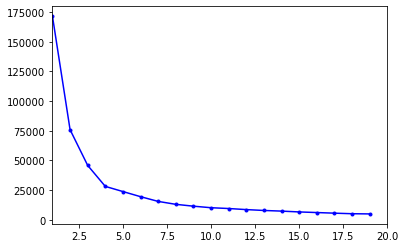

In [78]:
score = []
k_clusters = range(1,20)
for k in k_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X1)
    score.append(-kmeans.score(X1))
    

plt.plot(k_clusters, score,'b.-')
plt.xlim(1,20)

In [79]:
k = 11
kmeans = KMeans(n_clusters=k)
kmeans.fit(X1)

y_pred = kmeans.predict(X1)
y_pred

array([ 3,  0,  7,  0,  9,  0,  7,  5,  1,  8,  1,  5,  1,  0,  4,  0,  9,
        8, 10,  5,  9,  0,  1,  8,  1,  0, 10,  8, 10,  0,  1,  0,  1,  0,
        1,  0,  4,  8,  4,  0,  6,  5, 10,  8, 10,  8,  2,  3,  9,  9,  2,
        8,  3,  6,  2,  2,  2,  6,  3,  2,  6,  3,  6,  2,  6,  3,  2,  6,
        3,  9,  6,  2,  6,  6,  6,  3,  2,  2,  3,  2,  6,  2,  6,  2,  3,
        2,  2,  3,  8,  2,  6,  3,  2,  9,  9,  3,  2,  3,  2,  3,  3,  2,
        6,  3,  2,  3,  6,  2,  6,  6,  6,  3,  9,  3,  3,  3,  6,  2,  2,
        2,  3,  9,  2,  5,  9,  8, 10,  5,  1,  8,  1,  8,  9,  8,  7,  5,
        1,  8,  7,  8,  1,  5,  9,  5,  7,  5, 10,  8,  4,  5,  4,  5,  4,
        8,  4,  5,  7,  0,  7,  8, 10,  0,  7,  5, 10,  8,  4,  5,  4,  8,
        4,  8,  7,  5,  1,  5,  1,  8,  1,  5,  9,  5,  4,  5,  9,  5, 10,
        8,  4,  5,  4,  8,  7,  5,  4,  8, 10,  8,  4,  0], dtype=int32)

In [80]:
X1=X1.values

Text(0, 0.5, 'Score')

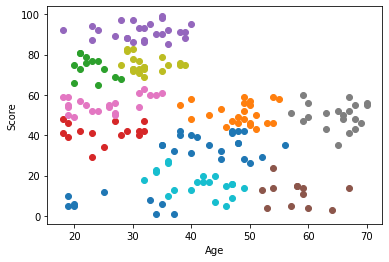

In [58]:
plt.plot(X[y_pred==0,0],X[y_pred==0,1],'o')
plt.plot(X[y_pred==1,0],X[y_pred==1,1],'o')
plt.plot(X[y_pred==2,0],X[y_pred==2,1],'o')
plt.plot(X[y_pred==3,0],X[y_pred==3,1],'o')
plt.plot(X[y_pred==4,0],X[y_pred==4,1],'o')
plt.plot(X[y_pred==5,0],X[y_pred==5,1],'o')
plt.plot(X[y_pred==6,0],X[y_pred==6,1],'o')
plt.plot(X[y_pred==7,0],X[y_pred==7,1],'o')
plt.plot(X[y_pred==8,0],X[y_pred==8,1],'o')
plt.plot(X[y_pred==9,0],X[y_pred==9,1],'o')
plt.plot(X[y_pred==10,0],X[y_pred==10,1],'o')
plt.xlabel('Age')
plt.ylabel('Score')

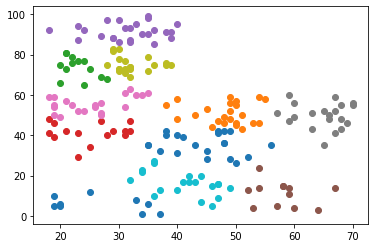

In [63]:
for i in range(k):
    plt.plot(X1[y_pred==i,0],X1[y_pred==i,1],'o')

Text(0.5, 0, 'Age')

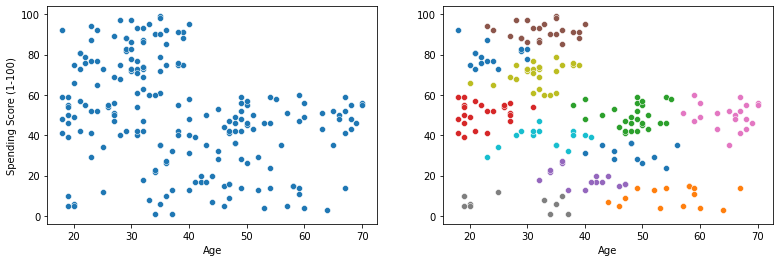

In [82]:
fig = plt.figure(figsize=(13,4))
ax1 = fig.add_subplot(1,2,1)
ax1=sns.scatterplot(data=data,y='Spending Score (1-100)',x='Age')
ax2=fig.add_subplot(1,2,2)
for i in range(k):
    ax2=sns.scatterplot(x=X1[y_pred==i,0],y=X1[y_pred==i,1])
ax2.set_xlabel('Age')


---
Ejercicio de las tarjetas de credito
Clase 05-05-2022
ocupar solo el account record